# Part 1: 911 Calls Visualization

This will be **part 1** of the project involving the [911 call dataset](https://www.kaggle.com/mchirico/montcoalert). Part 1 of this project is done using guide questions from Jose Portilla's - Python for Data Science and Machine Learning Bootcamp from Udemy. **Part 2** will be below.

The data will contain the following fields:
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

First we will import numpy, pandas, and the libraries needed for data visualization. We will also set %matplotlib inline in order to show the graphs on Jupyter Notebook and set it to show the style we want.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

Then we will read in the 911.csv file and make it a dataframe, df. We will also check the info on df to see the data types it contains.

In [3]:
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Check the head of df

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Creating a New 'Reason' Column

The title column in this dataset is a long string which includes a reason and description of why the person called 911. We want to create a new column called 'Reason' which would only contain the reason. For example 'EMS: BACK PAINS/INJURY' would only show up as 'EMS' in the Reason column

In [8]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


Most common reason for a 911 call

In [9]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Using Seaborn we can create a countplot to graph the 911 calls by Reason

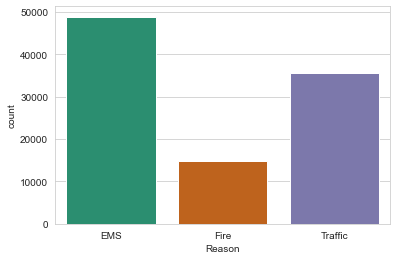

In [21]:
sns.countplot(x='Reason', data=df, palette='Dark2')

From this countplot we can tell that the most frequent reason for a 911 call is 'EMS.'

### Time Information

Next we will clean up the 'timeStamp' column in order to gain more insight. It is currently a string object so we will seperate it into different columns: 'Month','Day', and 'Hour.'

In [23]:
type(df['timeStamp'].iloc[0])

str

Using [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) we can convert the column from strings to DateTime objects

In [24]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

A DateTime object will allow us to grab specific attributes

In [27]:
time = df['timeStamp'].iloc[0]
print(time.year, time.day, time.hour, time.minute, time.second, time.dayofweek)

2015 10 17 40 0 3


Now we will create 3 more columns: 'Hour', 'Month', and 'Day of Weeek' 

In [29]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


Using the dictionary below wee can use .map() in order to map the string names to the day of the week.

In [30]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)
#df['Day of Week'].map(dmap) creates a series of what the dayofweek column
#would look like if you mapped every number to the corresponding day of week
#by setting it actually equal to that then you change the dataframe itself

In [31]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


Then we will create a countplot of the Day of the Week column with the hue based off the Reason column.

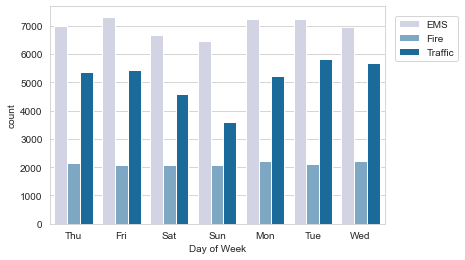

In [46]:
sns.countplot(x='Day of Week', data = df, 
              hue = 'Reason', palette = 'PuBu')

#relocating the legend
plt.legend(bbox_to_anchor=(1,1), loc=0, borderaxespad=1.)

From this plot we see that fire calls occur at a constant rate throughout the week. EMS calls occur at a slightly higher rate during weekdays. Traffic calls also occur less during weekends which makes sense as less people drive during these times.

Next we will do the same for the month:

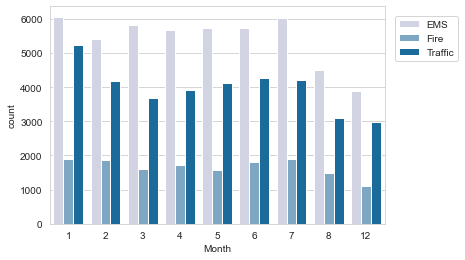

In [45]:
sns.countplot(x='Month', data = df, 
              hue = 'Reason', palette = 'PuBu')
plt.legend(bbox_to_anchor=(1,1), loc=2, borderaxespad=1.)

This graph is missing months 9 to 11. We will try to compensate for the lack of information by plotting the information with other methods. We can graph a simple line plot but first we need to clean up the data.

It is also important to note how the number of calls generally are on a downward trend for all reasons from Month 1 - 12.

We will create a groupby object byMonth, by grouping the month column and using the count() method for aggregation.

In [42]:
byMonth = df.groupby('Month').count()
byMonth.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Now we can create a simple line plot 

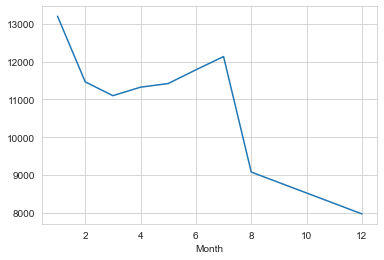

In [48]:
byMonth['desc'].plot()

As we can see the calls dramatically drop down from 13000 to 8000 from Month 1 to Month 12. This matches the previous trend seen in the countplot above.

We can further visualize the downward trend in the calls per month by creating an lmplot() to see the linear fit on the number of calls per month. We will need to reset the index to a column in order to create this graph.

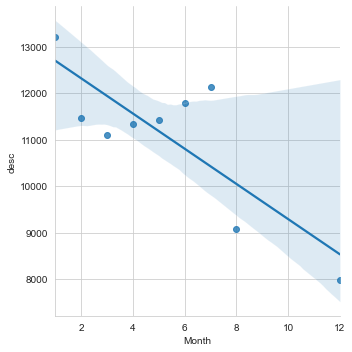

In [49]:
sns.lmplot(x='Month',y='desc',data=byMonth.reset_index())

Although we are missing some data points we can see from this lmplot that the linear fit shows a trend of a decrease in calls.

### Creating a new 'Date' column

Next we will create a new column containing the 'Date' which will come from the timeStamp column.

In [51]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


We can groupby the date column in order to see some interesting results when we graph the number of calls.

In [52]:
df.groupby('Date').count().head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


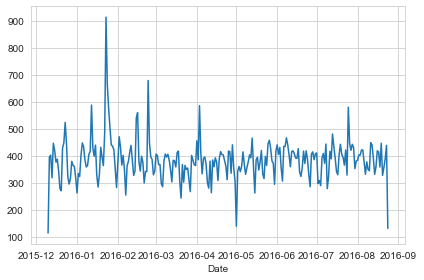

In [54]:
df.groupby('Date').count()['Reason'].plot()
plt.tight_layout()

As we can see on most dates there's a general trend of about 300-400 calls. On certain days it can reach as high as 900 or as low as about 100.

We can repeat the same process except with 3 graphs. Each graph plots the amount of calls for an individual reason. So there will be a graph for EMS, Traffic, and Fire.

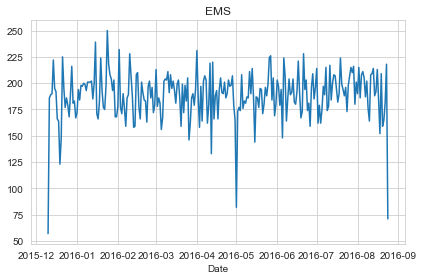

In [55]:
df[df['Reason']=='EMS'].groupby('Date').count()['Reason'].plot()
plt.title('EMS')
plt.tight_layout()

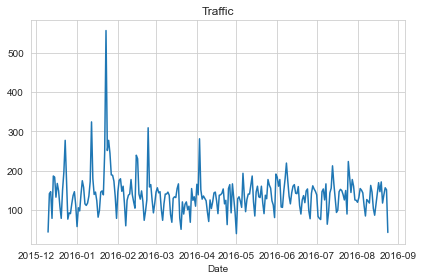

In [56]:
df[df['Reason']=='Traffic'].groupby('Date').count()['Reason'].plot()
plt.title('Traffic')
plt.tight_layout()

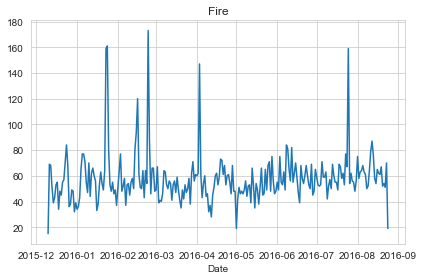

In [57]:
df[df['Reason']=='Fire'].groupby('Date').count()['Reason'].plot()
plt.title('Fire')
plt.tight_layout()

These 3 plots shows us that the spikes in 911 calls depends on the reason. For example the date with over 900 calls had generally average EMS calls, however, it had very high Fire and Traffic calls. We can assume that perhaps on this date a large fire occured as well as a large number of traffic accidents that could be due to the fire. 

### Visualizing using Heatmaps

Heatmaps are an interesting way to visualize and gain insights from data. In order to create heatmaps we must restructure the dataframe so that hours are columns, and days of the week are our index. We can use groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.

In [60]:
df.groupby(by=['Day of Week', 'Hour']).count().head(5)

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201

In [61]:
df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].head()

Day of Week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
Name: Reason, dtype: int64

Right now our dataframe has an outer index which is the 'Day of Week' and an inner index, 'Hour.' We will use unstack method in order to make hour a column.

In [63]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
dayHour.head(5)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


With this dataframe we can now create a heatmap.

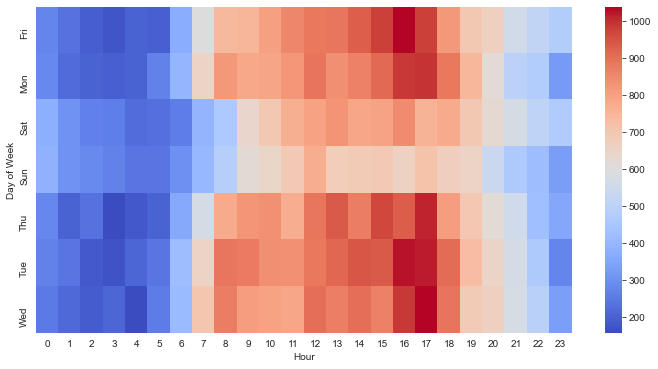

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm')

From this we can see that most of the 911 calls occur in the afternoon, specifically from 3-5 PM. Additionally very few calls are made from 8PM to 6AM which makes sense are most people are sleeping during these hours. The weekends also show less activity in terms of phone calls.

We will create another heatmap except with the months as our column.

In [69]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
dayMonth.head(5)

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


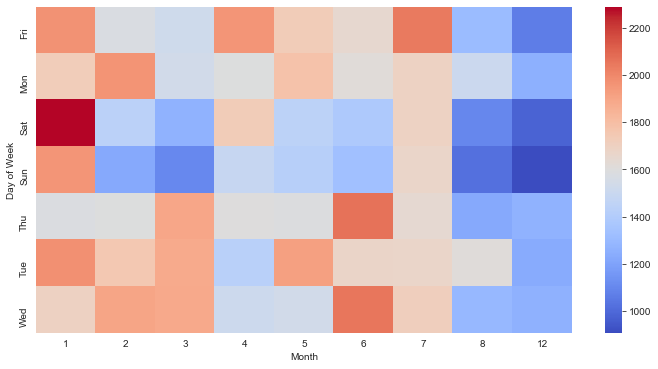

In [70]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='coolwarm')

Again from this we can see that calls are rarely made during weekends aside from an anomaly on the Saturdays of January.

# Part 2: 911 Calls Visualization

This is part 2 of the 911 calls visualization. Any code here is beyond Jose Portilla's course and is me trying to visualize the data on my own and seeing if I can get any valuable insights.

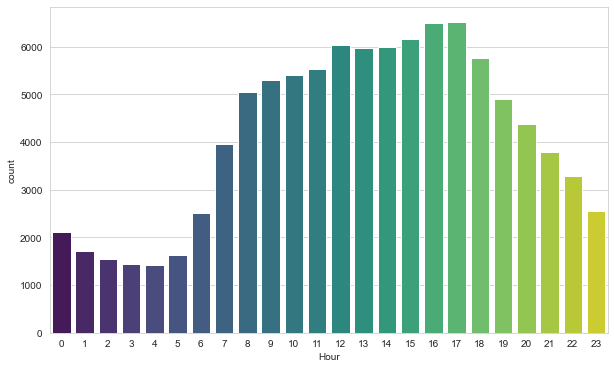

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(x='Hour', data=df, palette='viridis')

This countplot of the 911 calls for each hour validates the insights we got from the heatmaps. Let's also create one for the month.

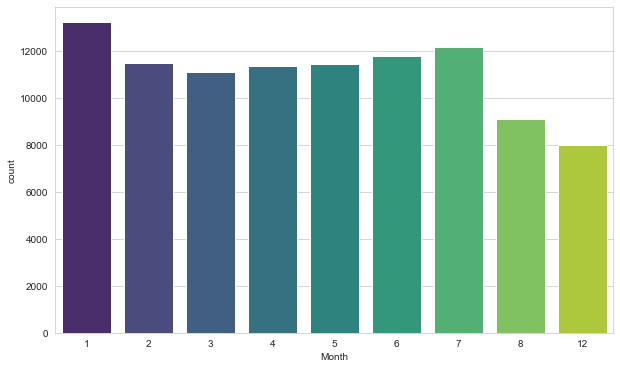

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(x='Month', data=df, palette='viridis')

This graph validates the results taken from the line plot and lmplot graphing the months.

### Creating a description column

Similar to creating a reason column we will create a new column called description. This will state the subtype of 911 call for example instead of Fire, the description column would state 'Fire Alarm.'

In [86]:
df['Desc'] = df['title'].apply(lambda title: title.split(':')[1])
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date,Desc
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10,DIZZINESS


We can create a barplot that will graph the calls by description. We will create 3 graphs, one for each main Reason type.

In [159]:
trafficCount = df[df['Reason']=='Traffic'].groupby('Desc').count().reset_index()
trafficCount

,Desc,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,DEBRIS/FLUIDS ON HIGHWAY -,67,67,67,62,67,67,67,66,67,67,67,67,67,67
1,DISABLED VEHICLE -,7702,7702,7702,5791,7702,7702,7701,7405,7702,7702,7702,7702,7702,7702
2,HAZARDOUS ROAD CONDITIONS -,1086,1086,1086,969,1086,1086,1085,1068,1086,1086,1086,1086,1086,1086
3,ROAD OBSTRUCTION -,3144,3144,3144,2505,3144,3144,3144,3127,3144,3144,3144,3144,3144,3144
4,VEHICLE ACCIDENT -,23066,23066,23066,19536,23066,23066,23066,22910,23066,23066,23066,23066,23066,23066
5,VEHICLE FIRE -,553,553,553,374,553,553,553,543,553,553,553,553,553,553
6,VEHICLE LEAKING FUEL -,77,77,77,61,77,77,77,77,77,77,77,77,77,77


Text(0.5, 1.0, 'Traffic')

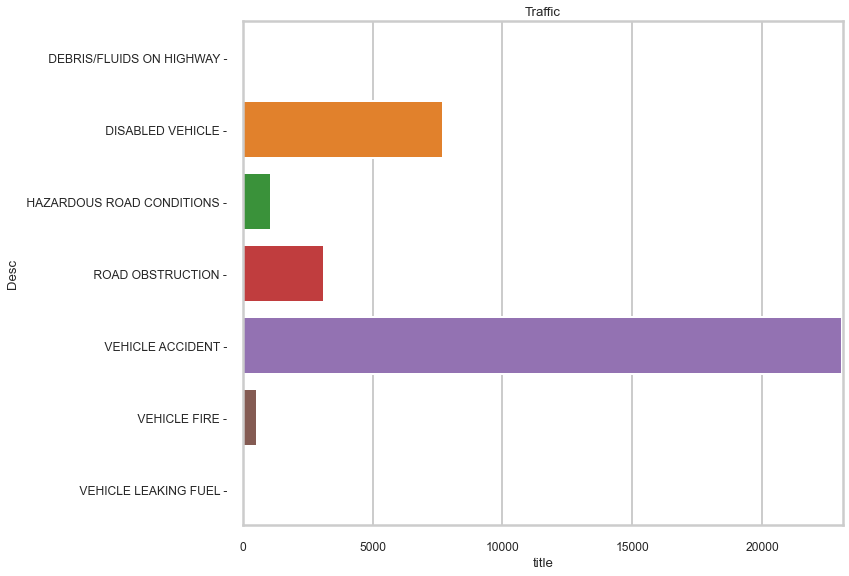

In [188]:
sns.set_context(context='poster', font_scale = 0.55)
plt.figure(figsize=(12,8))
plt.xlim(0,23100)
ax = sns.barplot(x='title', y='Desc', data=trafficCount)
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1.0, 'EMS')

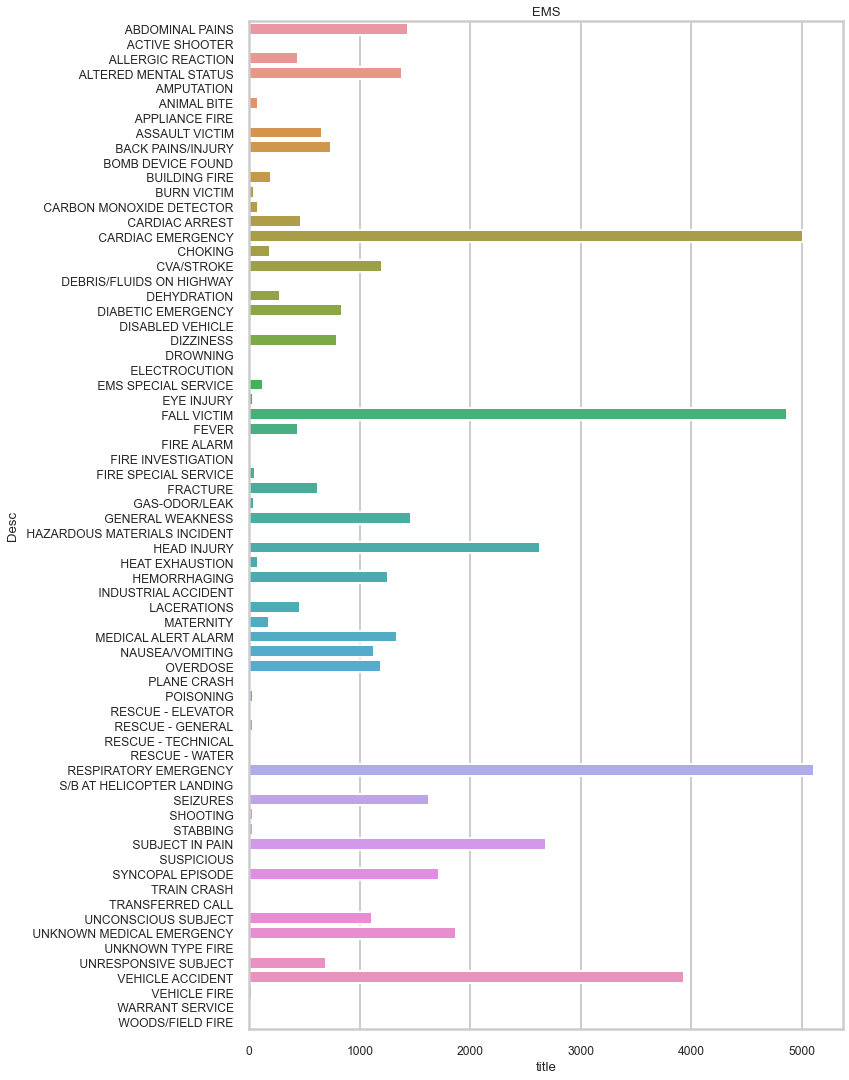

In [189]:
emsCount = df[df['Reason']=='EMS'].groupby('Desc').count().reset_index()
sns.set_context(context='poster', font_scale = 0.55)
plt.figure(figsize=(12,15))
ax = sns.barplot(x='title', y='Desc', data=emsCount)
plt.tight_layout()
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

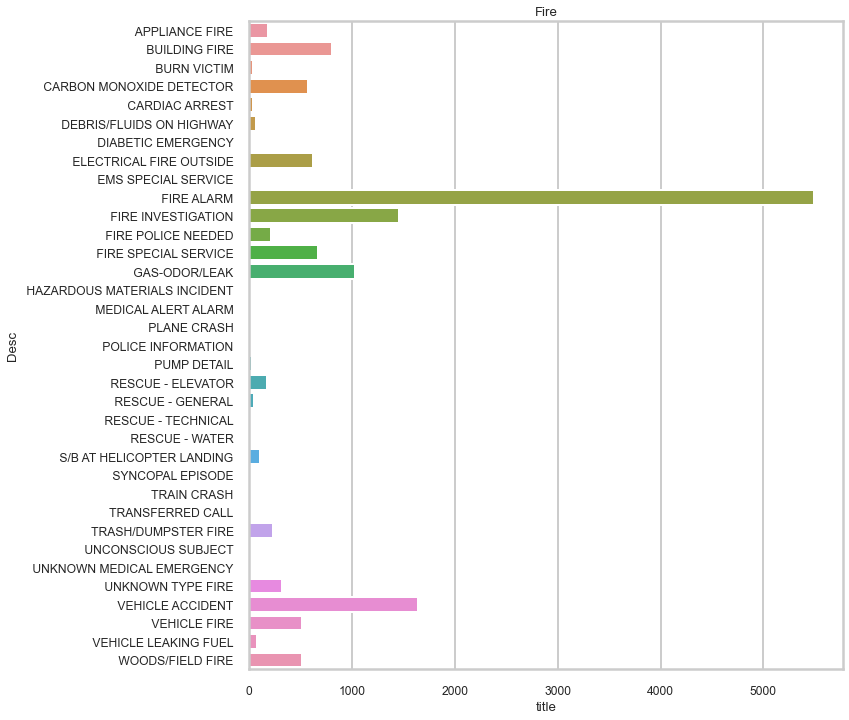

In [190]:
fireCount = df[df['Reason']=='Fire'].groupby('Desc').count().reset_index()
sns.set_context(context='poster', font_scale = 0.55)
plt.figure(figsize=(12,10))
ax = sns.barplot(x='title', y='Desc', data=fireCount)
plt.tight_layout()
plt.title('Fire')

From this data we can see that there are much more subtypes for EMS and Fire as compared to Traffic. Some interesting points to note:
- Traffic incidents are predominantly caused by vehicle accidents with very few calls for fluids on the highway or vehicle leaking fuel.
- EMS calls are quite varied however there are many subtypes such as bomb device found or electrecution that are quite rare. The most common reason for calls include respiratory emergency, cardiac emergency, and surprisingly fall victim.
- Calls pertaining to fire are predominantly due to Fire alarms, with the rest being marginally fewer.





### Which Townships Have the most calls

Next we want to gain insight on the top 5 townships that get the most calls

In [239]:
topTWP = df['twp'].value_counts().head(5)

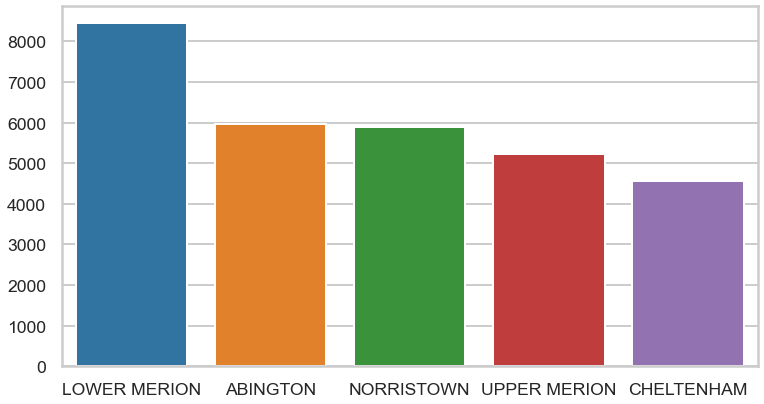

In [248]:
plt.figure(figsize=(11,6))
sns.barplot(topTWP.index,topTWP.values)
plt.tight_layout()